# Kareem Abdelhady-----------------------------------------------Assignment one

### -----------------------------------------------------------------------197155-----------------------------------------------------------------------

In [1]:
pip install mlxtend

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import SequentialFeatureSelector as SFS






df=pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Every column name referes to what?

#### meanfreq: mean frequency (in kHz)
#### sd: standard deviation of frequency
#### median: median frequency (in kHz)
#### Q25: first quantile (in kHz)
#### Q75: third quantile (in kHz)
#### IQR: interquantile range (in kHz)
#### skew: skewness (see note in specprop description)
#### kurt: kurtosis (see note in specprop description)
#### sp.ent: spectral entropy
#### sfm: spectral flatness
#### mode: mode frequency
#### centroid: frequency centroid (see specprop)
#### peakf: peak frequency (frequency with highest energy)
#### meanfun: average of fundamental frequency measured across acoustic signal
#### minfun: minimum fundamental frequency measured across acoustic signal
#### maxfun: maximum fundamental frequency measured across acoustic signal
#### meandom: average of dominant frequency measured across acoustic signal
#### mindom: minimum of dominant frequency measured across acoustic signal
#### maxdom: maximum of dominant frequency measured across acoustic signal
#### dfrange: range of dominant frequency measured across acoustic signal
#### modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
#### label: male or female

# see data set details

In [3]:
print(df.shape)
df.head()

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
print(df.dtypes)

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


# now we discoverd that the all the tables is float except only the Lable table 

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### there is no NULL values in the data

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3163    False
3164    False
3165    False
3166    False
3167    False
Length: 3168, dtype: bool

In [7]:
df.duplicated().sum()

2

In [8]:
df.drop_duplicates(keep ="last")

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# Mean fundamental frequency appears to be an indicator of voice gender, with a threshold of 140hz separating male from female classifications

### Visualizing the data

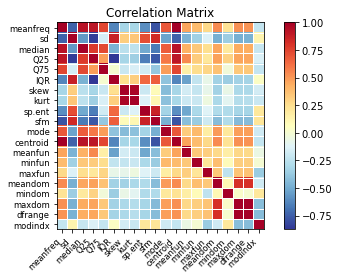

In [9]:
correlarion= df.corr()

sm.graphics.plot_corr(correlarion, xnames=list(correlarion.columns))
plt.show()

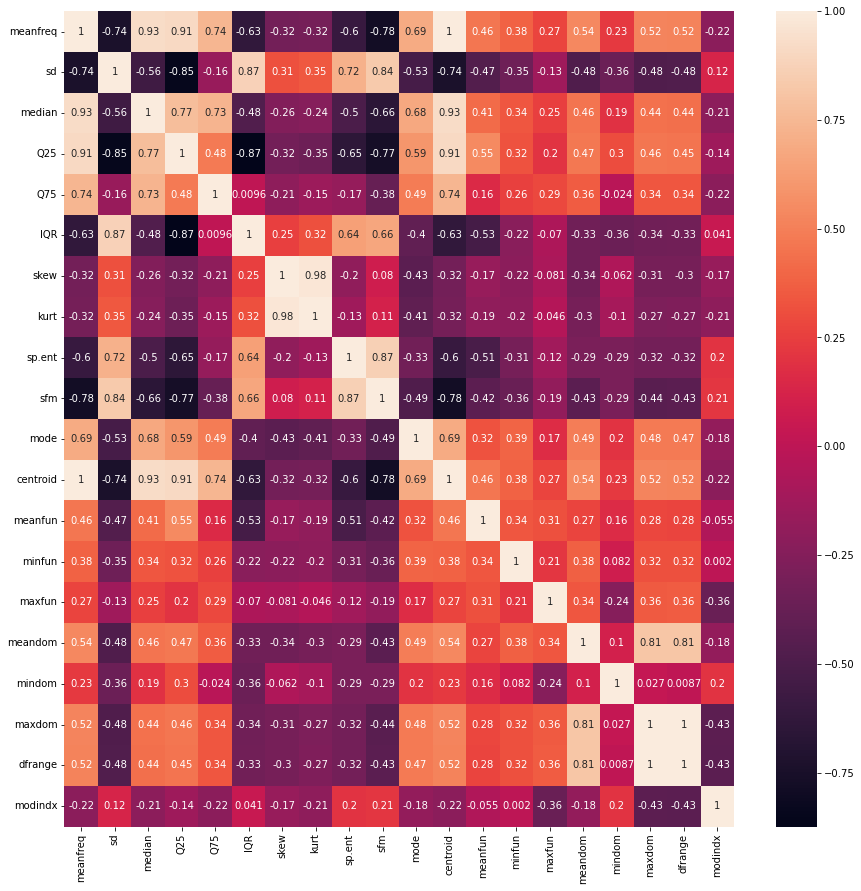

In [141]:

corrmat = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(15,15)


sns.heatmap(corrmat, annot=True)
plt.show()

In [10]:
df_copy=df.copy()

In [11]:
df_copy

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [12]:
df_copy['label']=df['label'].map({'male': 1, 'female': 0})

In [13]:
df_copy

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [14]:
X_df = df_copy.iloc[: , :20]
Y_df = df_copy.label

In [15]:
X_df.shape

(3168, 20)

In [16]:
Y_df=Y_df.values.reshape(-1,1)

In [17]:
X_df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
dtype: object

In [18]:
Y_df.shape

(3168, 1)

In [19]:
X_df.shape

(3168, 20)

### 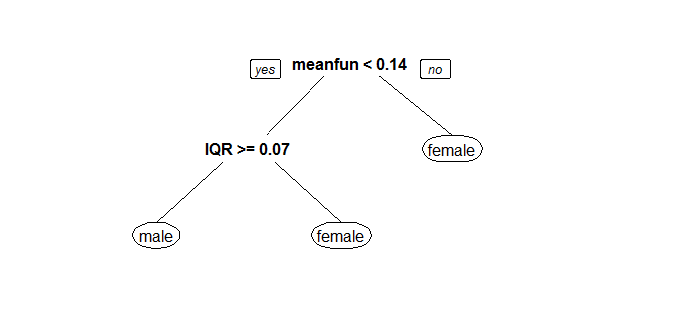

## DecisionTreeClassifier

In [20]:
X_df2 = df_copy.iloc[: , :20]
Y_df2 = df_copy.label

In [21]:
X_df2

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [22]:
Y_df2

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_df2,Y_df2, test_size=0.4, random_state=4)

In [24]:
X_train.shape

(1900, 20)

In [25]:
X_test.shape

(1268, 20)

In [26]:
y_test=y_test.values.reshape(-1,1)

In [27]:
y_test.shape

(1268, 1)

In [28]:
y_train=y_train.values.reshape(-1,1)

In [29]:
y_train.shape

(1900, 1)

In [30]:
treethree = DecisionTreeClassifier(max_depth=2, random_state=42)
treethree.fit(X_train, y_train)
y_pred2 = treethree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(treethree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(treethree.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.952


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


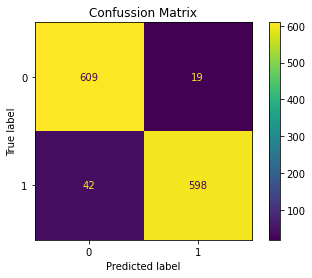

In [31]:
plot_confusion_matrix(treethree, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [32]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=treethree,
    X=X_df2,
    y=Y_df2,
    cv=5,
    scoring="accuracy",

)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

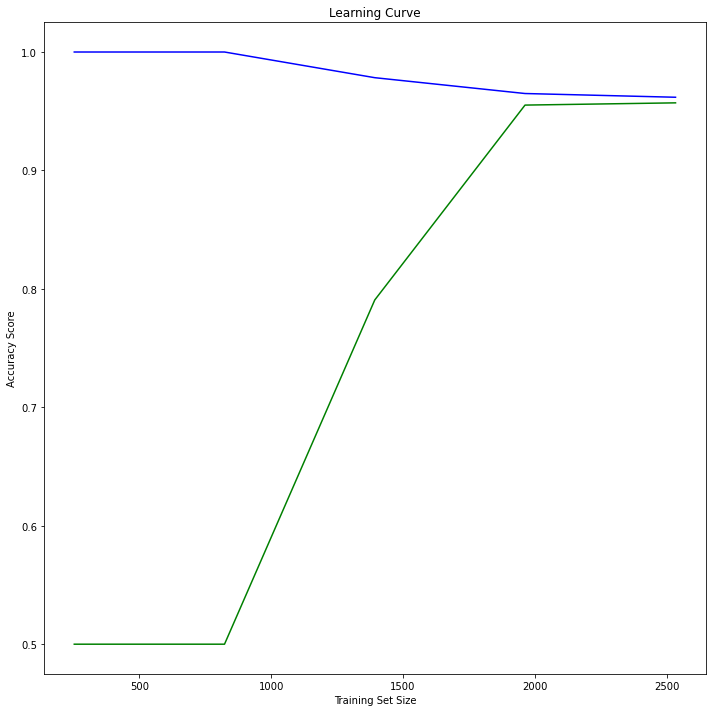

In [33]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean,color='b',  label="Training score")
plt.plot(train_sizes, test_mean,color='g', label="Cross-validation score")




plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.tight_layout()


plt.show()

# Finally it's DONE !!!!!!

# KNN

In [34]:
datax=df_copy.iloc[: , :20]
datay=df_copy['label']
datax

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [35]:
datax

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [36]:
datay

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_df2, Y_df2, test_size=0.4, random_state=42)

In [38]:
X_train.shape

(1900, 20)

In [39]:
X_test.shape

(1268, 20)

In [40]:
y_train.shape

(1900,)

In [41]:
y_test.shape

(1268,)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [43]:

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.699


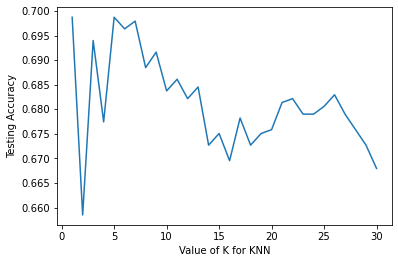

In [44]:

k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


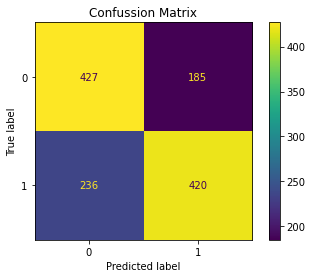

In [45]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [46]:
## predict the x_test and print a classification report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Male" ,"Female"]))

              precision    recall  f1-score   support

        Male       0.64      0.70      0.67       612
      Female       0.69      0.64      0.67       656

    accuracy                           0.67      1268
   macro avg       0.67      0.67      0.67      1268
weighted avg       0.67      0.67      0.67      1268



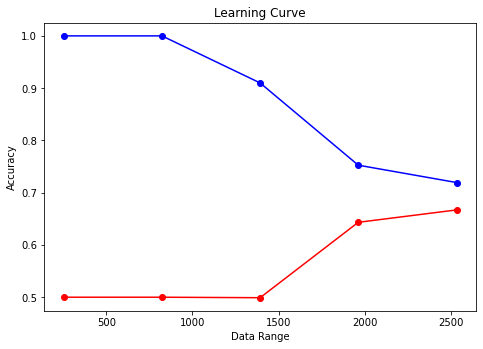

In [47]:
train_sizes_model, train_scores_model, valid_scores_model = learning_curve(knn, X_df2, Y_df2,cv=5,
                    scoring='accuracy')
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')

ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')

ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [48]:
df_copy.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [49]:
X1 = df_copy.drop(columns=['label'])

In [50]:
X1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [51]:
y1 = df_copy['label'].values

In [52]:
y1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:

knn.predict(X_test)[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [56]:

knn.score(X_test, y_test)

0.7460567823343849

In [57]:

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Male" ,"Female"]))

              precision    recall  f1-score   support

        Male       0.75      0.75      0.75       317
      Female       0.75      0.74      0.75       317

    accuracy                           0.75       634
   macro avg       0.75      0.75      0.75       634
weighted avg       0.75      0.75      0.75       634



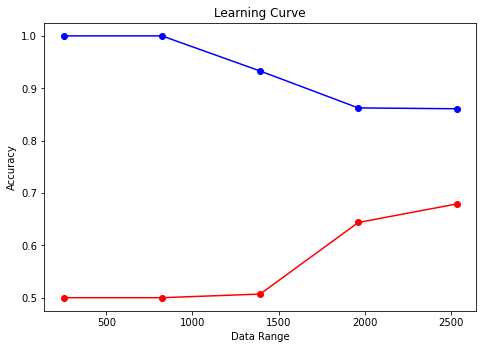

In [58]:
train_sizes_model, train_scores_model, valid_scores_model = learning_curve(knn, X1, y1,cv=5,
                    scoring='accuracy')
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')

ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')

ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

# Random Forest

In [59]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [60]:
X_RF=df_copy.iloc[:,:20]
Y_RF=df_copy['label']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.3, random_state=44)


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [64]:
rf_model.classes_


array([0, 1], dtype=int64)

In [65]:
rf_model.predict_proba(X_test)


array([[0.78, 0.22],
       [1.  , 0.  ],
       [0.94, 0.06],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [66]:
rf_model.feature_importances_

array([0.01782095, 0.0868104 , 0.01447861, 0.11700399, 0.00901072,
       0.2338391 , 0.00865563, 0.00770776, 0.04006329, 0.0200792 ,
       0.01733524, 0.02015829, 0.35401027, 0.01203902, 0.00588885,
       0.00775845, 0.00626571, 0.00820211, 0.00624521, 0.00662718])

In [67]:
importance=rf_model.feature_importances_
columns=X_RF.columns
i=0
while i<len(columns):
    print(f"the importance of feature {columns[i]} 'is {round(importance[i]*100,2)}%.")
    i+=1


the importance of feature meanfreq 'is 1.78%.
the importance of feature sd 'is 8.68%.
the importance of feature median 'is 1.45%.
the importance of feature Q25 'is 11.7%.
the importance of feature Q75 'is 0.9%.
the importance of feature IQR 'is 23.38%.
the importance of feature skew 'is 0.87%.
the importance of feature kurt 'is 0.77%.
the importance of feature sp.ent 'is 4.01%.
the importance of feature sfm 'is 2.01%.
the importance of feature mode 'is 1.73%.
the importance of feature centroid 'is 2.02%.
the importance of feature meanfun 'is 35.4%.
the importance of feature minfun 'is 1.2%.
the importance of feature maxfun 'is 0.59%.
the importance of feature meandom 'is 0.78%.
the importance of feature mindom 'is 0.63%.
the importance of feature maxdom 'is 0.82%.
the importance of feature dfrange 'is 0.62%.
the importance of feature modindx 'is 0.66%.


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


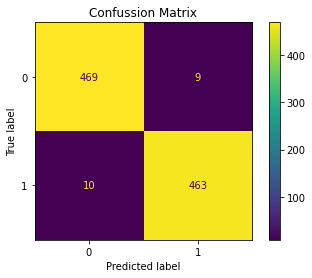

In [68]:
plot_confusion_matrix(rf_model, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [69]:
rf_model = RandomForestClassifier(max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred2 = rf_model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(X_test, y_test)))

Accuracy on training set: 0.937
Accuracy on test set: 0.934


In [70]:

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Male" ,"Female"]))

              precision    recall  f1-score   support

        Male       0.98      0.89      0.93       478
      Female       0.90      0.98      0.94       473

    accuracy                           0.93       951
   macro avg       0.94      0.93      0.93       951
weighted avg       0.94      0.93      0.93       951



In [71]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X_df2,
    y=Y_df2,
    cv=5,
    scoring="accuracy",

)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

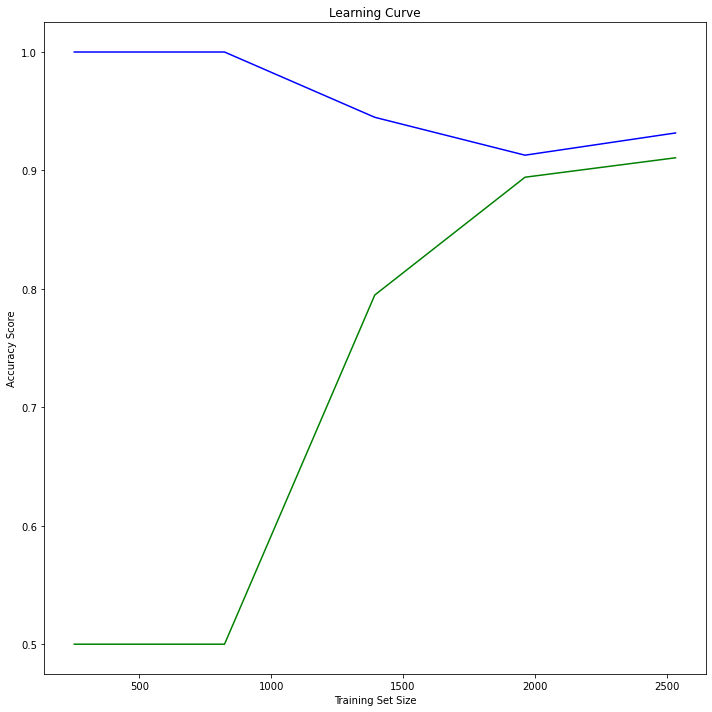

In [72]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean,color='b')
plt.plot(train_sizes, test_mean,color='g')




plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.tight_layout()


plt.show()

# Bias correction of numerical prediction model temperature forecast Data Set


In [73]:
from sklearn.feature_selection import VarianceThreshold

In [74]:
df_reg=pd.read_csv('Bias_correction_ucl.csv')

In [75]:
df_reg

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [76]:
df_reg.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [77]:
df_reg.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [78]:
df_reg.dropna(inplace=True)

In [79]:
df_reg.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# As we can observe, there are no null values present in the data.

# Using describe, we’ll see whether there is any sudden jump in the data’s values.

# The values present in the columns are pretty consistent throughout the data.



In [80]:
from sklearn.feature_selection import VarianceThreshold
XX = df_reg.drop(["Date"], axis=1)
yy = df_reg["Date"]


vt = VarianceThreshold(threshold=800)
vt.fit(XX)

VarianceThreshold(threshold=800)

In [81]:
poke_gen_subset = XX.iloc[:,vt.get_support()].head()
poke_gen_subset

,LDAPS_LH,DEM,Solar radiation
0,69.451805,212.3350,5992.895996
1,51.937448,44.7624,5869.312500
2,20.573050,33.3068,5863.555664
3,65.727144,45.7160,5856.964844
4,107.965535,35.0380,5859.552246


In [82]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=42)

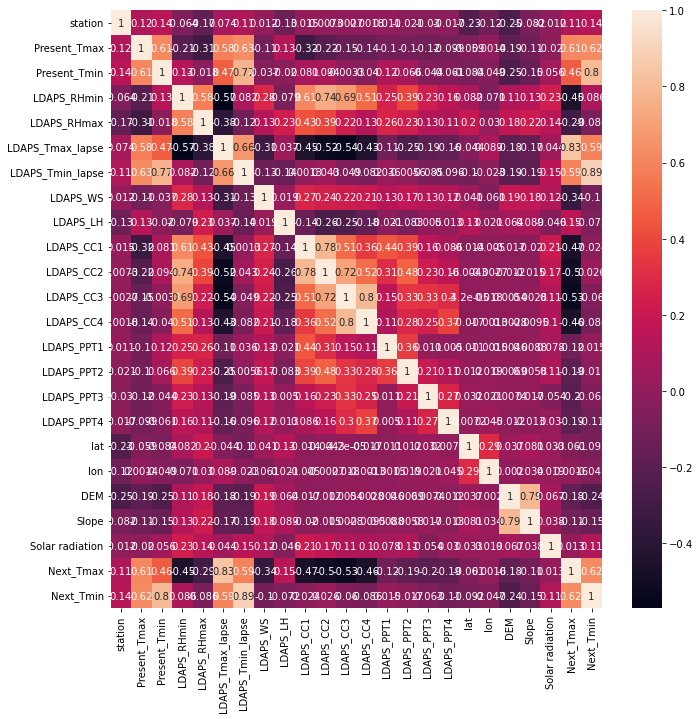

In [83]:

corrmat = X_train.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11,11)


sns.heatmap(corrmat, annot=True)
plt.show()

In [84]:
def correlation(dataset, threshold):
    col_corr = set() 
    

    corr_matrix = dataset.corr() 
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
         
            if abs(corr_matrix.iloc[i, j]) > threshold: 
            

                colname = corr_matrix.columns[i] 


                col_corr.add(colname)

    return col_corr

In [85]:

correlated_features = correlation(XX, 0.7)
len(set(correlated_features))

7

In [86]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

In [87]:
X_train.shape, X_test.shape

((5691, 17), (1897, 17))

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, yy, random_state=42)

sfs = SFS(LogisticRegression(max_iter=5000),
         k_features = (1, 3),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          
          #n_jobs= -1
         ).fit(X_train1, y_train1)

In [517]:
print(sfs.k_feature_names_)

None


# linear regression:

# Equation of simple linear regression
#### y = c + m * X

# The m values are known as model coefficients or model parameters.

In [92]:
df_reg

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [93]:
df_reg.shape

(7588, 25)

In [94]:
XL_df=pd.DataFrame(df_reg.LDAPS_LH)

In [95]:
YL_df=pd.DataFrame(df_reg.DEM)

In [96]:
ZL_df=pd.DataFrame(df_reg['Solar radiation'])

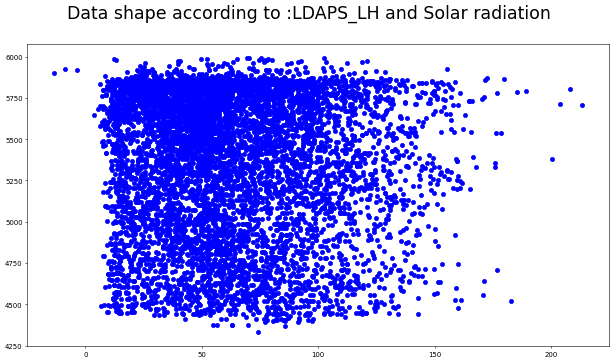

In [97]:
fig = plt.figure(figsize=(15, 8), dpi=50)
plt.scatter(XL_df,ZL_df,c="b")
fig.suptitle('Data shape according to :LDAPS_LH and Solar radiation', fontsize=25)

plt.show()

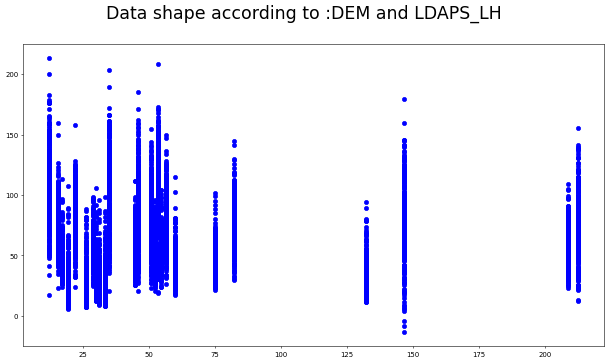

In [98]:
fig = plt.figure(figsize=(15, 8), dpi=50)
plt.scatter(YL_df,XL_df,c="b")
fig.suptitle('Data shape according to :DEM and LDAPS_LH', fontsize=25)

plt.show()

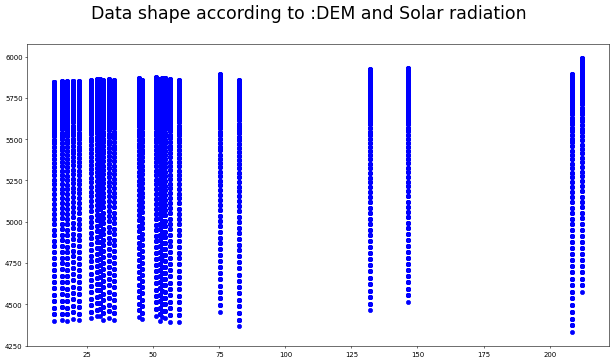

In [99]:
fig = plt.figure(figsize=(15, 8), dpi=50)
plt.scatter(YL_df,ZL_df,c="b")
fig.suptitle('Data shape according to :DEM and Solar radiation', fontsize=25)

plt.show()

In [100]:
def Hypofunction (theta, X) :
    return theta[1] * X + theta[0]

In [101]:
# Sum Square Error will be used as the cost function
def costFunction (X, y, Z,theta) :
    return np.average(np.square(y - Hypofunction(theta, X))) / 2

In [102]:
theta = np.array([0, 0, 0])
X = np.array(XL_df) 
y = np.array(YL_df)
Z = np.array(ZL_df)

In [103]:
costFunction(X, y, Z, theta)

3392.2562593481557

In [134]:
def GradientDescent(X,y,Z,learningRate=0.01,iterations=100):
    converged=False
    itr=0
    cost=[]
    #Convert the feature space and repsonse to matrix
    X=np.matrix(X).T #shape: (97,1)
    y=np.matrix(y).T #shape:(97,1)
    
    #Adding a column of ones to X
    ones=np.ones(X.shape[0])
    X=np.c_[ones,X]  #Shape(97,2)
    
    #Initializing thetas to zero
    theta=np.zeros((X.shape[1],1)) #shape(2,1)
    
    #number of samples
    m=X.shape[0] 
    
    for i in range(iterations):
        hypothesis=np.dot(X,theta) #linear regression function
        
        loss=hypothesis-y    #difference between predicted and actual
        
        J=np.sum(np.power(loss,2))/(2*m)  ##cost function
        cost.append(J)
        #Gradient Descent
        gradient = np.dot(X.T,loss)/m
        theta = theta - learningRate*gradient
        
        if itr %10==0:
            print('SSE at Iteartion '+str(itr)+' is '+str(J))
        itr+=1
        
    plt.plot(np.arange(0,100),cost)
    plt.xlabel('No.of Iterations')
    plt.ylabel('J(cost)')
    plt.show()
    return theta

In [135]:
XL_df=pd.DataFrame(df_reg.LDAPS_LH)
YL_df=pd.DataFrame(df_reg.DEM)
ZL_df=pd.DataFrame(df_reg['Solar radiation'])

SSE at Iteartion 0 is 3392.2562593481557
SSE at Iteartion 10 is 1.1762590869882804e+37
SSE at Iteartion 20 is 8.836646946443098e+70
SSE at Iteartion 30 is 6.638531435792436e+104
SSE at Iteartion 40 is 4.987197054618485e+138
SSE at Iteartion 50 is 3.746632022783543e+172
SSE at Iteartion 60 is 2.8146574840365957e+206
SSE at Iteartion 70 is 2.114511567793983e+240
SSE at Iteartion 80 is 1.5885269151550028e+274
SSE at Iteartion 90 is inf


C:\Users\kaboz\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kaboz\AppData\Local\Temp/ipykernel_8636/1865454566.py:24: RuntimeWarning: overflow encountered in power
  J=np.sum(np.power(loss,2))/(2*m)  ##cost function


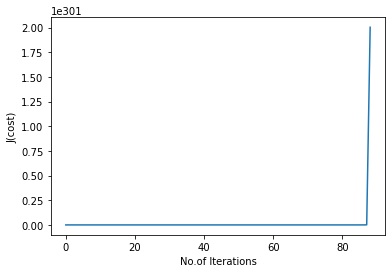

In [136]:
theta=GradientDescent(X=df_reg.LDAPS_LH,y=df_reg.DEM,Z=df_reg['Solar radiation'])

In [137]:

XX1= XL_df
YY1= YL_df
ZZ1= ZL_df
linear_regressor = LinearRegression()
linear_regressor.fit(XX1, YY1)
Y_pred = linear_regressor.predict(XX1)
linear_regressor.intercept_, linear_regressor.coef_

(array([56.23813955]), array([[0.0908907]]))

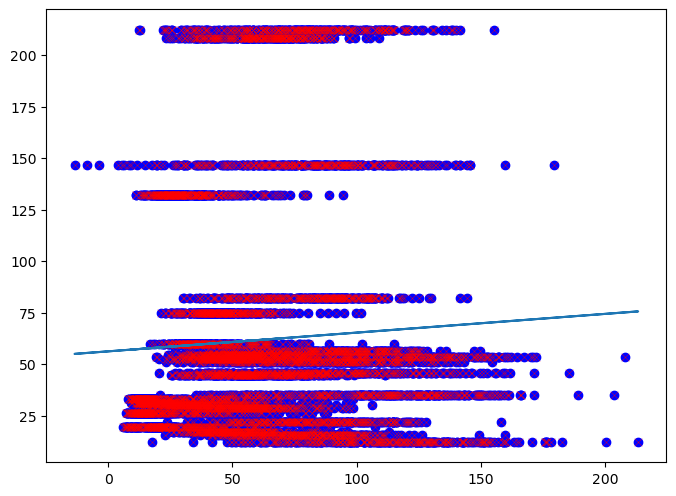

In [138]:
fig = plt.figure(figsize=(8, 6), dpi=100)

#Plotting
plt.scatter(XX1, YY1, c="blue")
plt.scatter(XX1, YY1, s=30, c='r', marker='x', linewidths=0.25)
plt.plot(XX1, Y_pred,label='Linear regression (Scikit-learn GLM)')
plt.show()




In [139]:
print('The final forumla is: \n {:.3f}*X +{:.3f}'.format(linear_regressor.coef_.item(),linear_regressor.intercept_.item()))

The final forumla is: 
 0.091*X +56.238
